In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('Train.csv')

train.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [3]:
test = pd.read_csv('test.csv')

test.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDW58       20.750          Low Fat         0.007565  Snack Foods   
1           FDW14        8.300              reg         0.038428        Dairy   
2           NCN55       14.600          Low Fat         0.099575       Others   
3           FDQ58        7.315          Low Fat         0.015388  Snack Foods   
4           FDY38          NaN          Regular         0.118599        Dairy   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  107.8622            OUT049                       1999      Medium   
1   87.3198            OUT017                       2007         NaN   
2  241.7538            OUT010                       1998         NaN   
3  155.0340            OUT017                       2007         NaN   
4  234.2300            OUT027                       1985      Medium   

  Outlet_Location_Type        Outlet_Type  
0               Tier 1  Supermarket Type1  
1               Tier 2  Supermarket Type1  
2               Tier 3      Grocery Store  
3               Tier 2  Supermarket Type1  
4               Tier 3  Supermarket Type3

In [4]:
test.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year
count  4705.000000      5681.000000  5681.000000                5681.000000
mean     12.695633         0.065684   141.023273                1997.828903
std       4.664849         0.051252    61.809091                   8.372256
min       4.555000         0.000000    31.990000                1985.000000
25%       8.645000         0.027047    94.412000                1987.000000
50%      12.500000         0.054154   141.415400                1999.000000
75%      16.700000         0.093463   186.026600                2004.000000
max      21.350000         0.323637   266.588400                2009.000000

In [5]:
train.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

In [6]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [7]:
train['Outlet_Size'] = train['Outlet_Size'].fillna(value='medium')

train['Outlet_Size'] = train['Outlet_Size'].apply(lambda s: str(s).lower())

In [8]:
type_group = train.groupby('Item_Type')

by_sales = pd.DataFrame(type_group['Item_Outlet_Sales'].sum())

by_sales.head()

# by_sales = by_type.sort_values(by='Item_Outlet_Sales')

# by_sales.plot(kind='barh',color="green")

Item_Outlet_Sales
Item_Type                      
Baking Goods       1.265525e+06
Breads             5.532372e+05
Breakfast          2.322990e+05
Canned             1.444151e+06
Dairy              1.522594e+06

In [9]:
plt.show()

In [10]:
cols = ['Item_Fat_Content','Item_Type','Outlet_Establishment_Year','Outlet_Size', 'Outlet_Location_Type','Outlet_Type']

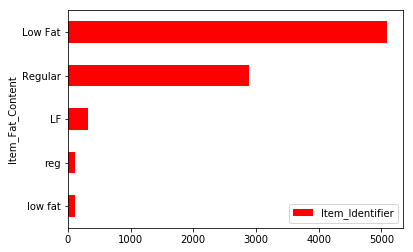

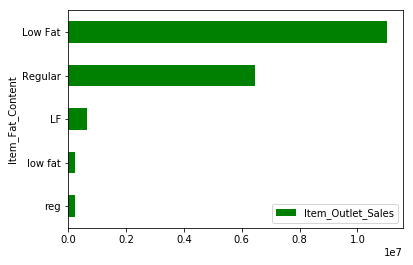

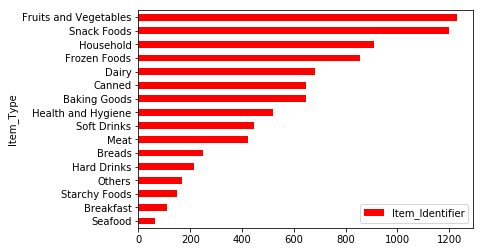

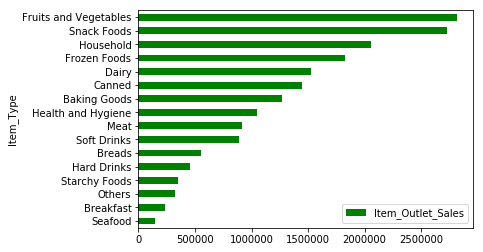

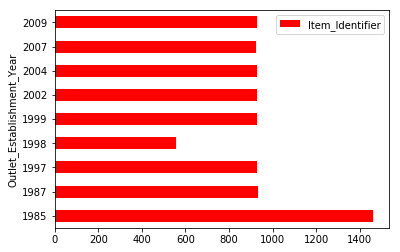

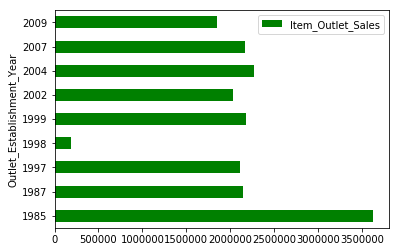

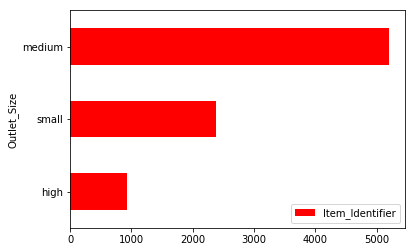

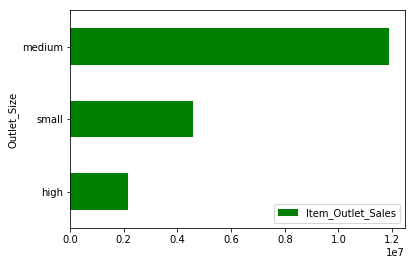

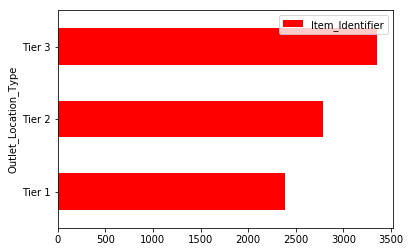

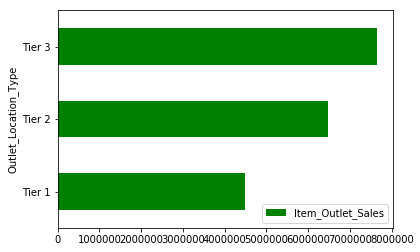

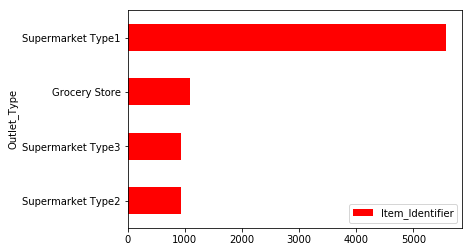

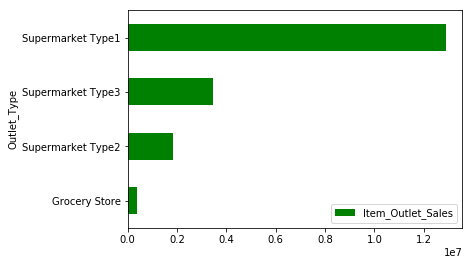

In [11]:
for col in cols:
    type_group = train.groupby(col)

    by_count = pd.DataFrame(type_group['Item_Identifier'].count())
    
    if(col!='Outlet_Establishment_Year'):
        by_count = by_count.sort_values(by='Item_Identifier')

    by_count.plot(kind='barh',color="red")
    
    by_sales = pd.DataFrame(type_group['Item_Outlet_Sales'].sum())

    if(col!='Outlet_Establishment_Year'):
        by_sales = by_sales.sort_values(by='Item_Outlet_Sales')

    by_sales.plot(kind='barh',color="green")
    
    plt.show()

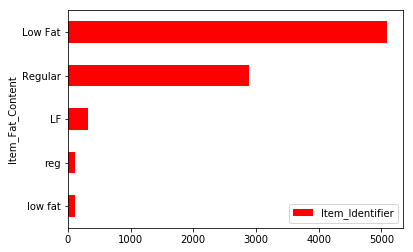

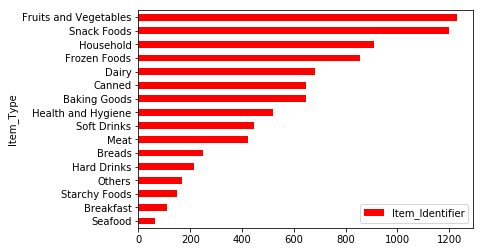

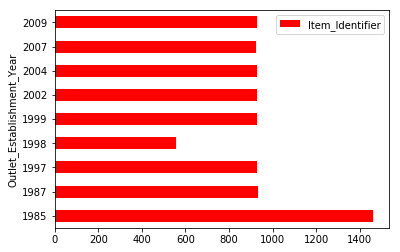

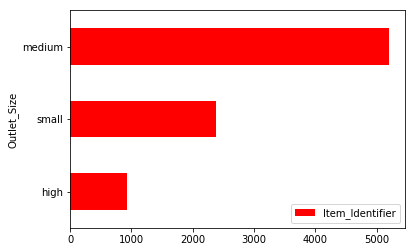

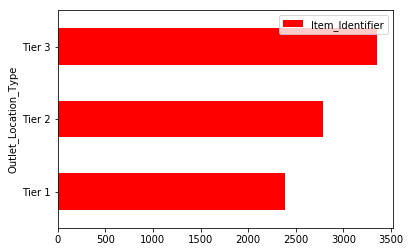

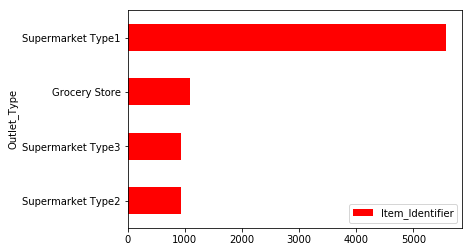

In [12]:
for col in cols:
    type_group = train.groupby(col)

    by_count = pd.DataFrame(type_group['Item_Identifier'].count())
    
    if(col!='Outlet_Establishment_Year'):
        by_count = by_count.sort_values(by='Item_Identifier')

    by_count.plot(kind='barh',color="red")
    
    plt.show()

In [13]:
X_train = train.drop("Item_Outlet_Sales",axis=1)

In [14]:
X_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [15]:
X_train.fillna(value=X_train.Item_Weight.median())

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
5              FDP36       10.395          Regular         0.000000   
6              FDO10       13.650          Regular         0.012741   
7              FDP10       12.600          Low Fat         0.127470   
8              FDH17       16.200          Regular         0.016687   
9              FDU28       19.200          Regular         0.094450   
10             FDY07       11.800          Low Fat         0.000000   
11             FDA03       18.500          Regular         0.045464   
12             FDX32       15.100          Regular         0.100014   
13             FDS46       17.600          Regular         0.047257   
14             FDF32       16.350          Low Fat         0.068024   
15             FDP49        9.000          Regular         0.069089   
16             NCB42       11.800          Low Fat         0.008596   
17             FDP49        9.000          Regular         0.069196   
18             DRI11       12.600          Low Fat         0.034238   
19             FDU02       13.350          Low Fat         0.102492   
20             FDN22       18.850          Regular         0.138190   
21             FDW12       12.600          Regular         0.035400   
22             NCB30       14.600          Low Fat         0.025698   
23             FDC37       12.600          Low Fat         0.057557   
24             FDR28       13.850          Regular         0.025896   
25             NCD06       13.000          Low Fat         0.099887   
26             FDV10        7.645          Regular         0.066693   
27             DRJ59       11.650          low fat         0.019356   
28             FDE51        5.925          Regular         0.161467   
29             FDC14       12.600          Regular         0.072222   
...              ...          ...              ...              ...   
8493           FDP21        7.420          Regular         0.025886   
8494           NCI54       15.200          Low Fat         0.000000   
8495           FDE22        9.695          Low Fat         0.029567   
8496           FDJ57        7.420          Regular         0.021696   
8497           FDT08       13.650          Low Fat         0.049209   
8498           NCP54       15.350          Low Fat         0.035293   
8499           NCK53       11.600          Low Fat         0.037574   
8500           NCQ42       20.350          Low Fat         0.000000   
8501           FDW21        5.340          Regular         0.005998   
8502           NCH43        8.420          Low Fat         0.070712   
8503           FDQ44       20.500          Low Fat         0.036133   
8504           NCN18       12.600          Low Fat         0.124111   
8505           FDB46       10.500          Regular         0.094146   
8506           DRF37       17.250          Low Fat         0.084676   
8507           FDN28        5.880          Regular         0.030242   
8508           FDW31       11.350          Regular         0.043246   
8509           FDG45        8.100          Low Fat         0.214306   
8510           FDN58       13.800          Regular         0.056862   
8511           FDF05       17.500          Low Fat         0.026980   
8512           FDR26       20.700          Low Fat         0.042801   
8513           FDH31       12.000          Regular         0.020407   
8514           FDA01       15.000          Regular         0.054489   
8515           FDH24       20.700          Low Fat         0.021518   
8516           NCJ19       18.600          Low Fat         0.118661   
8517           FDF53       20

In [16]:
median_weights = pd.DataFrame(X_train.groupby('Item_Type')['Item_Weight'].median())

median_weights = median_weights.reset_index()

X_train_new = X_train.merge(median_weights, on='Item_Type')

In [17]:
X_train_new['Outlet_Size'] = X_train_new['Outlet_Size'].fillna(value='medium')

In [18]:
X_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [19]:
X_train_new.describe()

Item_Weight_x  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count    7060.000000      8523.000000  8523.000000                8523.000000   
mean       12.857645         0.066132   140.992782                1997.831867   
std         4.643456         0.051598    62.275067                   8.371760   
min         4.555000         0.000000    31.290000                1985.000000   
25%         8.773750         0.026989    93.826500                1987.000000   
50%        12.600000         0.053931   143.012800                1999.000000   
75%        16.850000         0.094585   185.643700                2004.000000   
max        21.350000         0.328391   266.888400                2009.000000   

       Item_Weight_y  
count    8523.000000  
mean       12.599642  
std         0.837247  
min        10.100000  
25%        12.150000  
50%        13.100000  
75%        13.150000  
max        14.500000

In [20]:
X_train_new['Item_Weight_x'] = X_train_new['Item_Weight_x'].fillna(value=X_train_new.Item_Weight_y)

In [21]:
X_train_new = X_train_new.rename(columns={'Item_Weight_x':'Item_Weight'})

X_train_new = X_train_new.drop('Item_Weight_y',axis=1)

X_train_new = X_train_new.drop('Item_Identifier',axis=1)

In [22]:
X_train_new.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year
count  8523.000000      8523.000000  8523.000000                8523.000000
mean     12.813390         0.066132   140.992782                1997.831867
std       4.241384         0.051598    62.275067                   8.371760
min       4.555000         0.000000    31.290000                1985.000000
25%       9.310000         0.026989    93.826500                1987.000000
50%      12.850000         0.053931   143.012800                1999.000000
75%      16.000000         0.094585   185.643700                2004.000000
max      21.350000         0.328391   266.888400                2009.000000

In [23]:
X_train_dummies = pd.get_dummies(X_train_new)

In [24]:
X_train_dummies.head()

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0        9.300         0.016047  249.8092                       1999   
1       18.500         0.045464  144.1102                       1997   
2       13.350         0.102492  230.5352                       2004   
3        5.925         0.161467   45.5086                       1998   
4       19.250         0.170349   55.7956                       1998   

   Item_Fat_Content_LF  Item_Fat_Content_Low Fat  Item_Fat_Content_Regular  \
0                    0                         1                         0   
1                    0                         0                         1   
2                    0                         1                         0   
3                    0                         0                         1   
4                    0                         1                         0   

   Item_Fat_Content_low fat  Item_Fat_Content_reg  Item_Type_Baking Goods  \
0                         0                     0                       0   
1                         0                     0                       0   
2                         0                     0                       0   
3                         0                     0                       0   
4                         0                     0                       0   

               ...                Outlet_Size_high  Outlet_Size_medium  \
0              ...                               0                   1   
1              ...                               0                   0   
2              ...                               0                   0   
3              ...                               0                   1   
4              ...                               0                   1   

   Outlet_Size_small  Outlet_Location_Type_Tier 1  \
0                  0                            1   
1                  1                            1   
2                  1                            0   
3                  0                            0   
4                  0                            0   

   Outlet_Location_Type_Tier 2  Outlet_Location_Type_Tier 3  \
0                            0                            0   
1                            0                            0   
2                            1                            0   
3                            0                            1   
4                            0                            1   

   Outlet_Type_Grocery Store  Outlet_Type_Supermarket Type1  \
0                          0                              1   
1                          0                              1   
2                          0                              1   
3                          1                              0   
4                          1                              0   

   Outlet_Type_Supermarket Type2  Outlet_Type_Supermarket Type3  
0                              0                              0  
1                              0                              0  
2                              0                              0  
3                              0                              0  
4                              0                              0  

[5 rows x 45 columns]

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()

In [27]:
from sklearn.model_selection import train_test_split

In [52]:
x_train, x_test, y_train, y_test = train_test_split(X_train_dummies,train['Item_Outlet_Sales'])

In [53]:
x_scale = scaler.fit(X_train_dummies)


In [54]:
x_train_scaled = x_scale.transform(x_train)
x_test_scaled = x_scale.transform(x_test)


In [55]:
from sklearn.ensemble import 

In [56]:
rfr = RandomForestRegressor()

In [57]:
rfr.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [58]:
rfr.score(x_train,y_train)

0.78735980526146687

In [59]:
rfr.score(x_test,y_test)


# Really bad performance on new data -> pre-process data to achieve success

-0.18813698865856177

In [60]:
test_new = test.merge(median_weights,on='Item_Type')

test_new['Item_Weight_x'] = test_new['Item_Weight_x'].fillna(value=test_new.Item_Weight_y)

test_new = test_new.rename(columns={'Item_Weight_x':'Item_Weight'})

test_new = test_new.drop('Item_Weight_y',axis=1)

test_new = test_new.drop('Item_Identifier',axis=1)


In [61]:
test_new.head()

Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  Item_MRP  \
0       20.750          Low Fat         0.007565  Snack Foods  107.8622   
1        7.315          Low Fat         0.015388  Snack Foods  155.0340   
2        6.305          Regular         0.123365  Snack Foods   95.7436   
3       13.600          Low Fat         0.196898  Snack Foods  193.7136   
4       19.200          Low Fat         0.035179  Snack Foods  180.7318   

  Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0            OUT049                       1999      Medium   
1            OUT017                       2007         NaN   
2            OUT045                       2002         NaN   
3            OUT010                       1998         NaN   
4            OUT035                       2004       Small   

  Outlet_Location_Type        Outlet_Type  
0               Tier 1  Supermarket Type1  
1               Tier 2  Supermarket Type1  
2               Tier 2  Supermarket Type1  
3               Tier 3      Grocery Store  
4               Tier 2  Supermarket Type1

In [62]:
test_dummies = pd.get_dummies(test_new)

In [63]:
test_dummies

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0          20.750         0.007565  107.8622                       1999   
1           7.315         0.015388  155.0340                       2007   
2           6.305         0.123365   95.7436                       2002   
3          13.600         0.196898  193.7136                       1998   
4          19.200         0.035179  180.7318                       2004   
5           6.785         0.038455  209.4928                       1998   
6          18.250         0.075195  124.9046                       1997   
7          13.350         0.000000  179.6660                       1987   
8          13.150         0.129825  263.2568                       1985   
9          13.150         0.299544  124.8704                       1985   
10          5.340         0.005988  100.6358                       2009   
11          6.610         0.028988  188.6898                       1987   
12         18.250         0.054541  140.4154                       2007   
13         14.000         0.042023   53.0640                       1999   
14         20.350         0.054167  116.9466                       2002   
15         16.750         0.029861   39.5822                       2009   
16         20.350         0.000000  118.9466                       1999   
17         15.200         0.019112  236.2248                       2009   
18          8.895         0.081073   51.2008                       2004   
19          6.890         0.137200  191.8820                       2007   
20         13.150         0.047028  118.3782                       1985   
21         16.750         0.045302  189.1556                       2007   
22         18.500         0.052069  117.0124                       1997   
23         10.800         0.028919  240.9222                       1987   
24         15.600         0.000000  169.2132                       1997   
25         13.150         0.136086  259.8962                       1985   
26         17.500         0.000000  255.2356                       1987   
27          5.340         0.005976  100.8358                       2002   
28         10.695         0.011425   73.6038                       1997   
29          5.095         0.216763  142.2838                       1998   
...           ...              ...       ...                        ...   
5651       18.600         0.152678   99.9358                       2009   
5652        7.895         0.061522   55.3588                       2007   
5653       10.695         0.142413  126.4994                       1985   
5654        7.895         0.094714  102.5332                       1999   
5655        6.425         0.063274  132.8626                       1999   
5656       10.600         0.033239   52.1008                       2007   
5657        8.895         0.072339  174.8370                       1987   
5658       17.250         0.125120   41.8480                       1987   
5659       15.600         0.239530  126.4994                       1998   
5660       13.850         0.056308  231.8300                       2004   
5661        8.060         0.021377  229.3326                       1997   
5662       10.695         0.000000  176.1712                       1999   
5663       15.600         0.143106  126.7994                       1997   
5664        9.000         0.069076   57.0614                       2004   
5665       20.750         0.063424  154.3682                       1999   
5666       20.750         0.063454  153.2682                       2002   
5667       20.750         0.089399  193.9478                       1999   
5668        7.865         0.061060  162.7526                       1997   
5669       20.750         0.089442  192.0478                       2002   
5670        8.895         0.000000  176.6370                       2004   
5671       13.850         0.056319  234.0300                       1997   
5672       20.750         0.089

In [64]:
X_train_dummies

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0           9.300         0.016047  249.8092                       1999   
1          18.500         0.045464  144.1102                       1997   
2          13.350         0.102492  230.5352                       2004   
3           5.925         0.161467   45.5086                       1998   
4          19.250         0.170349   55.7956                       1998   
5          13.350         0.102512  230.6352                       1997   
6           6.420         0.089499  178.1002                       1998   
7          13.350         0.255395  196.8794                       1985   
8          13.650         0.078946  186.0240                       2002   
9           8.895         0.105274   39.9138                       1999   
10         13.300         0.079806  232.5300                       1997   
11         19.250         0.102350   52.7956                       2007   
12          6.920         0.038532   60.5852                       2002   
13          5.750         0.075108  112.8176                       1987   
14         13.350         0.098664   62.9194                       1985   
15         13.800         0.058091  245.1802                       2004   
16         13.350         0.049755  152.1340                       1985   
17         14.100         0.087977  229.0668                       2004   
18         13.350         0.058153  152.0340                       1985   
19         13.600         0.119418  231.0300                       2002   
20         20.350         0.089395  260.1594                       1987   
21         19.850         0.005234  264.0884                       2004   
22          7.075         0.058585  142.7128                       2009   
23         20.250         0.014791  193.6162                       2004   
24         11.150         0.008327  149.9708                       2007   
25         20.700         0.092613   76.3670                       1987   
26          7.075         0.058347  142.2128                       1997   
27         13.350         0.153741  182.6292                       1985   
28         20.700         0.047685  212.5876                       2009   
29          7.575         0.055390  195.2768                       1997   
...           ...              ...       ...                        ...   
8493        5.365         0.140458  169.7764                       1999   
8494       11.650         0.000000  109.4596                       1985   
8495       10.395         0.031288  159.5604                       2002   
8496       17.750         0.073560   33.9216                       2002   
8497       11.650         0.034050  112.2860                       2007   
8498       20.750         0.129864  240.1880                       2009   
8499        5.365         0.140240  171.0764                       1997   
8500       11.650         0.145591  148.7050                       1985   
8501       19.850         0.054331  198.7768                       2007   
8502       17.750         0.073397   35.1216                       2004   
8503       11.650         0.033830  111.6860                       1987   
8504       20.750         0.000000  239.9880                       2002   
8505        5.365         0.141034  173.6764                       2007   
8506       17.350         0.146527  147.9050                       1999   
8507       19.850         0.054015  196.3768                       2004   
8508       11.650         0.033858  113.3860                       1997   
8509       11.650         0.000000  184.3582                       1985   
8510       11.650         0.256152  151.0050                       1985   
8511       11.650         0.128533   34.2216                       1985   
8512        5.365         0.140812  173.5764                       2009   
8513        5.365         0.140124  172.0764                       1987   
8514        7.970         0.036

In [65]:
X_train_dummies.shape

(8523, 45)

In [66]:
test_dummies.shape

(5681, 45)

In [67]:
result = pd.DataFrame(test['Item_Identifier'])

In [68]:
result['prediction'] = rfr.predict(test_dummies)

In [69]:
result.head()

Item_Identifier  prediction
0           FDW58  1996.80078
1           FDW14  1520.48746
2           NCN55  2518.45508
3           FDQ58  1773.82436
4           FDY38  1886.87720